<a href="https://colab.research.google.com/github/ahmadizza/Supervised-Models-Building-Energy-Analysis/blob/main/Colab_Supervised_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPERVISED MODELS**
----
----

**Tujuan Bisnis Data Science Serta yang Menjadi Latar Belakang**

Menilai dari peningkatan efisiensi energi bisa menjadi tantangan karena tidak ada cara untuk benar-benar mengetahui berapa banyak energi yang akan digunakan sebuah bangunan tanpa adanya peningkatan tersebut. Hal terbaik yang bisa kita lakukan adalah membangun model kontra-faktual.

Setelah sebuah bangunan diperbaharui, konsumsi energi baru (yang lebih rendah) dibandingkan dengan nilai yang dimodelkan untuk bangunan asli untuk menghitung penghematan dari renovasi tersebut. Model yang lebih akurat dapat mendukung insentif pasar yang lebih baik dan memungkinkan pembiayaan dengan biaya lebih rendah.

**Tujuan Teknis**

Data yang akan digunakan pada studi kasus kita adalah data "rata-rata" penggunaan energi listrik dari berbagai gedung (tidak lagi time-series).

*   Lakukan proses Data Mining dengan menggunakan seluruh metode yang relevan/sesuai.
*   Mencari informasi/insight "non-trivial" sebanyak-banyaknya.
*   Mendapatkan model yang optimal, tapi BUKAN mendapatkan model yang paling akurat (seperti machine learning).

# **Data Understanding**

- **building_id**: Foreign key untuk metadata bangunan.
- **meter_reading**: Target variable, yaitu konsumsi energi dalam kWh (atau yang setara). Catatan: Data ini merupakan data asli yang mengandung error pengukuran, sehingga diharapkan ada tingkat error baseline pada model. *UPDATE*: Untuk site 0, pembacaan meter listrik menggunakan satuan kBTU.
- **primary_use**: Indikator kategori utama aktivitas bangunan berdasarkan definisi EnergyStar property type.
- **square_feet**: Luas lantai total bangunan (gross floor area).
- **year_built**: Tahun bangunan dibuka.
- **floor_count**: Jumlah lantai bangunan.
- **air_temperature**: Suhu udara dalam derajat Celsius.
- **cloud_coverage**: Bagian langit yang tertutup awan, dalam satuan oktas.
- **dew_temperature**: Suhu titik embun dalam derajat Celsius.
- **precip_depth_1_hr**: Curah hujan dalam satu jam, dalam milimeter.
- **sea_level_pressure**: Tekanan udara di permukaan laut, dalam millibar/hectopascals.
- **wind_direction**: Arah angin dalam derajat kompas (0-360).
- **wind_speed**: Kecepatan angin dalam meter per detik.

# **Load Data**

In [ ]:
# Importing Some Python Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings; warnings.simplefilter('ignore')

In [ ]:
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

[Errno 2] No such file or directory: 'data/Ashrae_Energy_Mean.csv'  Trying to load data from GitHub.
--2024-11-24 15:27:59--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241207 (236K) [text/plain]
Saving to: ‘data/Ashrae_Energy_Mean.csv’

Ashrae_Energy_Mean. 100%[===================>] 235.55K  --.-KB/s    in 0.04s   

2024-11-24 15:27:59 (5.68 MB/s) - ‘data/Ashrae_Energy_Mean.csv’ saved [241207/241207]

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


# **Prepocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


## Mengubah Tipe Data

Mengubah tipe data primary_use menjadi category.

In [ ]:
df['primary_use'] = df['primary_use'].astype('category')

## Duplikasi Data

In [ ]:
df.duplicated().sum()

0

Tidak ada duplikasi data pada dataset.

## Noise

Melihat noise pada kolom numerik.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
meter_reading,1413.0,185.383188,374.899500,0.000400,27.224943,74.933148,182.884848,5072.323426
square_feet,1413.0,92204.792640,111412.340117,283.000000,22949.000000,57673.000000,115288.000000,875000.000000
year_built,663.0,1968.170437,31.026539,1900.000000,1949.500000,1970.000000,1995.500000,2017.000000
floor_count,352.0,3.738636,3.336731,1.000000,1.000000,3.000000,5.000000,26.000000
air_temperature,1413.0,15.697154,5.416736,7.572136,11.058629,15.204244,21.325261,24.963702
cloud_coverage,1396.0,2.166618,1.461644,0.059266,0.665832,2.083712,2.998727,5.671785
dew_temperature,1413.0,8.259831,4.625295,-0.304675,4.512823,8.285693,9.834399,17.379328
precip_depth_1_hr,1237.0,1.187860,1.478667,0.155325,0.775686,0.895980,1.033215,11.675633
sea_level_pressure,1324.0,1016.466990,1.921973,1011.436563,1016.404579,1016.797495,1017.949437,1018.052063
wind_direction,1413.0,175.351051,24.921236,123.388701,153.629430,184.295922,187.301104,207.134076


In [ ]:
print(df.iloc[740]) # Terdapat noise dimana meter_reading 0.0004 tidak sesuai dengan luas bangunan yang tertera

meter_reading             0.0004
primary_use            Education
square_feet                37975
year_built                1976.0
floor_count                  1.0
air_temperature        11.058629
cloud_coverage          0.388354
dew_temperature         8.353095
precip_depth_1_hr            NaN
sea_level_pressure           NaN
wind_direction        206.606135
wind_speed              4.846472
Name: 740, dtype: object


In [ ]:
df = df.drop(index=740) # Menghapus noise tersebut

In [ ]:
df['primary_use'].unique()

['Education', 'Lodging/residential', 'Office', 'Entertainment/public assembly', 'Other', ..., 'Healthcare', 'Utility', 'Technology/science', 'Manufacturing/industrial', 'Services']
Length: 16
Categories (16, object): ['Education', 'Entertainment/public assembly',
                          'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science',
                          'Utility', 'Warehouse/storage']

In [ ]:
df['year_built'].unique()

array([2008., 2004., 1991., 2002., 1975., 2000., 1981., 1989., 2003.,
       2010., 1968., 1999., 2013., 1974., 1996., 1980., 1977., 1990.,
       1985., 2001., 1969., 2005., 2016., 2006., 2014., 1970., 1971.,
       2011., 1997., 2007., 1998., 2009., 1979., 1986., 1982., 1983.,
         nan, 1913., 1953., 1909., 1958., 1960., 1976., 1906., 1900.,
       1995., 1956., 1930., 1967., 1919., 1955., 1965., 1907., 2012.,
       1992., 1948., 1950., 1941., 1957., 1964., 1940., 1951., 1966.,
       1934., 1959., 1993., 1939., 1918., 1963., 1987., 1914., 1973.,
       1988., 1935., 1942., 2015., 1931., 1928., 1929., 1908., 1927.,
       1923., 1962., 1944., 1910., 1949., 2017., 1922., 1911., 1932.,
       1978., 1912., 1916., 1924., 1926., 1904., 1984., 1903., 1925.,
       1961., 1921., 1972., 1936., 1954., 1905., 1920., 1917., 1952.,
       1994., 1933., 1945., 1915., 1947., 1946., 1902., 1937.])

## Missing Values

In [ ]:
df.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
year_built,750
floor_count,1061
air_temperature,0
cloud_coverage,17
dew_temperature,0
precip_depth_1_hr,175
sea_level_pressure,88


In [ ]:
# Salin data awal
df = df.copy()

# Drop kolom dengan missing value lebih dari 50%
threshold = 0.5  # Ambang batas 50%
missing_percentage = df.isna().mean()
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df = df.drop(columns=columns_to_drop)

print("Kolom yang di-drop:", list(columns_to_drop))

# Lakukan interpolasi pada kolom numerik yang tersisa
cols_to_interpolate = df.select_dtypes(include=['float64', 'int64']).columns  # Hanya kolom numerik
df[cols_to_interpolate] = df[cols_to_interpolate].interpolate(
    method='linear',  # Interpolasi linear
    axis=0            # Berdasarkan indeks
)


Kolom yang di-drop: ['year_built', 'floor_count']


In [ ]:
df.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
air_temperature,0
cloud_coverage,0
dew_temperature,0
precip_depth_1_hr,0
sea_level_pressure,0
wind_direction,0
wind_speed,0


## Outlier

Batas bawah: -206.28981151470666
Batas atas: 416.4280846431184

Outliers:
0        True
1        True
2        True
3        True
4       False
        ...  
1408     True
1409     True
1410     True
1411     True
1412     True
Name: meter_reading, Length: 1412, dtype: bool


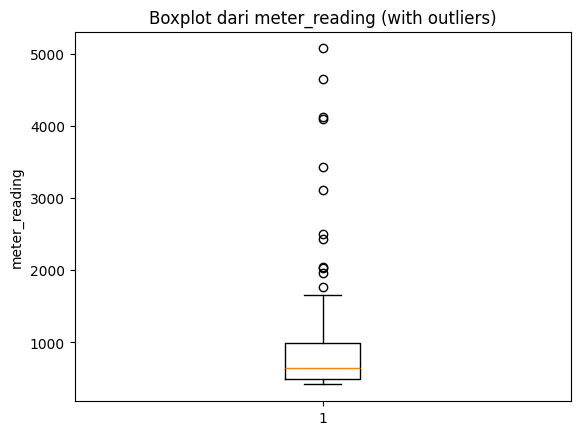

In [ ]:
# Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
# Ubah kolom 'meter_reading' menjadi tipe numerik dengan menangani error
df['meter_reading'] = pd.to_numeric(df['meter_reading'], errors='coerce')

# Hapus baris dengan nilai 'meter_reading' yang tidak valid (introduced by errors='coerce')
df = df.dropna(subset=['meter_reading'])

Q1 = df['meter_reading'].quantile(0.25)
Q3 = df['meter_reading'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (df["meter_reading"] >= Q1 - 1.5 * IQR) & (df["meter_reading"] <= Q3 + 1.5*IQR)

# Membuat DataFrame tanpa outlier
df2 = df[bukan_outlier]

# Membuat DataFrame dengan outlier
df_outlier = df[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(df_outlier['meter_reading'])
plt.title("Boxplot dari meter_reading (with outliers)")
plt.ylabel("meter_reading")
plt.show()

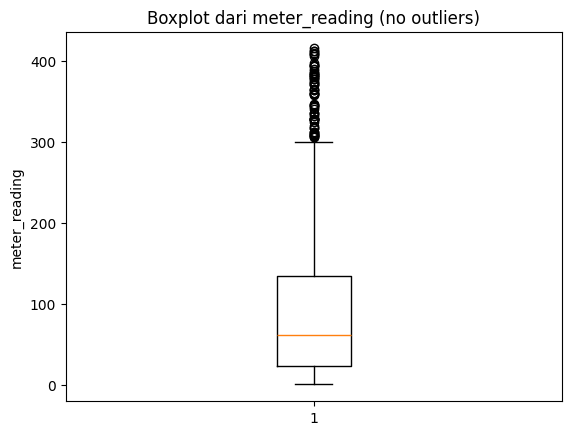

In [ ]:
plt.boxplot(df2['meter_reading'])
plt.title("Boxplot dari meter_reading (no outliers)")
plt.ylabel("meter_reading")
plt.show()

# **EDA**

## **Rata-rata Meter Reading Bedasarkan Temperatur**


Average Meter Reading by Temperature Range:
air_temperature
Very Cold           NaN
Cold         108.465553
Mild          79.768838
Warm         105.884182
Hot                 NaN
Name: meter_reading, dtype: float64


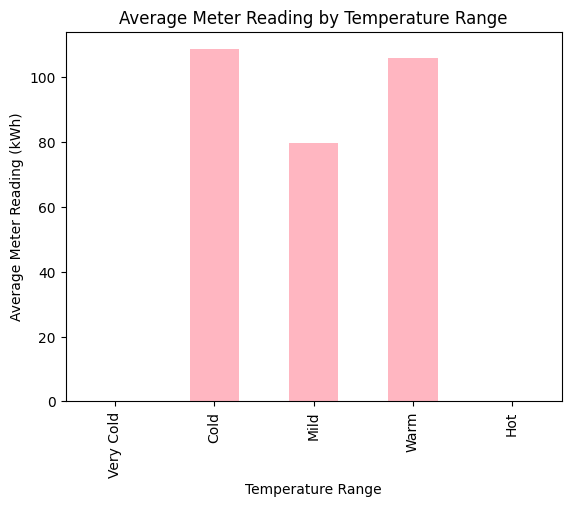

In [ ]:
bins = [-10, 0, 10, 20, 30, 40]
labels = ['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']

mean_reading_by_temp = (df2.groupby(pd.cut(df2['air_temperature'], bins=bins, labels=labels))['meter_reading'].mean())

print("\nAverage Meter Reading by Temperature Range:")
print(mean_reading_by_temp)

mean_reading_by_temp.plot(kind='bar', color='lightpink')
plt.title('Average Meter Reading by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Meter Reading (kWh)')
plt.show()

### **Interpretasi**:

- Rata-rata konsumsi energi terendah tercatat pada rentang suhu "Mild" (10°C hingga 20°C), sebesar 79,77 kWh. Rentang suhu ini tampaknya menjadi kondisi ideal bagi operasional bangunan, di mana kebutuhan untuk pemanas (heater) atau pendingin udara (AC) berada pada tingkat minimum. Hal ini mengindikasikan bahwa suhu moderat mengurangi beban energi untuk pengendalian iklim dalam ruangan, sehingga efisiensi energi dapat tercapai secara alami.

- Rata-rata konsumsi energi meningkat signifikan pada rentang suhu "Cold" (0°C hingga 10°C) dan "Warm" (20°C hingga 30°C), masing-masing mencapai 108,47 kWh dan 105,88 kWh. Pada suhu "Cold," peningkatan ini terutama disebabkan oleh kebutuhan sistem pemanas untuk menjaga kenyamanan ruangan. Sebaliknya, pada suhu "Warm," konsumsi energi lebih banyak dialokasikan untuk sistem pendingin. Polanya menunjukkan bahwa konsumsi energi bangunan sangat dipengaruhi oleh kondisi iklim, di mana suhu ekstrem, baik dingin maupun hangat, meningkatkan kebutuhan energi secara signifikan. Temuan ini dapat membantu memprioritaskan pengelolaan energi berdasarkan musim.

- Ketiadaan data pada rentang suhu "Very Cold" (< 0°C ) dan "Hot" (> 30°C ) menunjukkan bahwa konsumsi energi untuk suhu ekstrem ini tidak tersedia atau tidak signifikan, karena data di rentang tersebut berupa NaN. Hal ini kemungkinan disebabkan oleh karakteristik geografis bangunan dalam dataset, yang berada di wilayah dengan iklim moderat atau normal. Selain itu, minimnya data untuk suhu ekstrem dapat mengindikasikan kebutuhan untuk meninjau kembali cakupan dataset atau melibatkan lebih banyak lokasi yang mencerminkan variasi iklim yang lebih luas.

## **Meter Reading Bedasarkan Kategori Pengguna Utama**

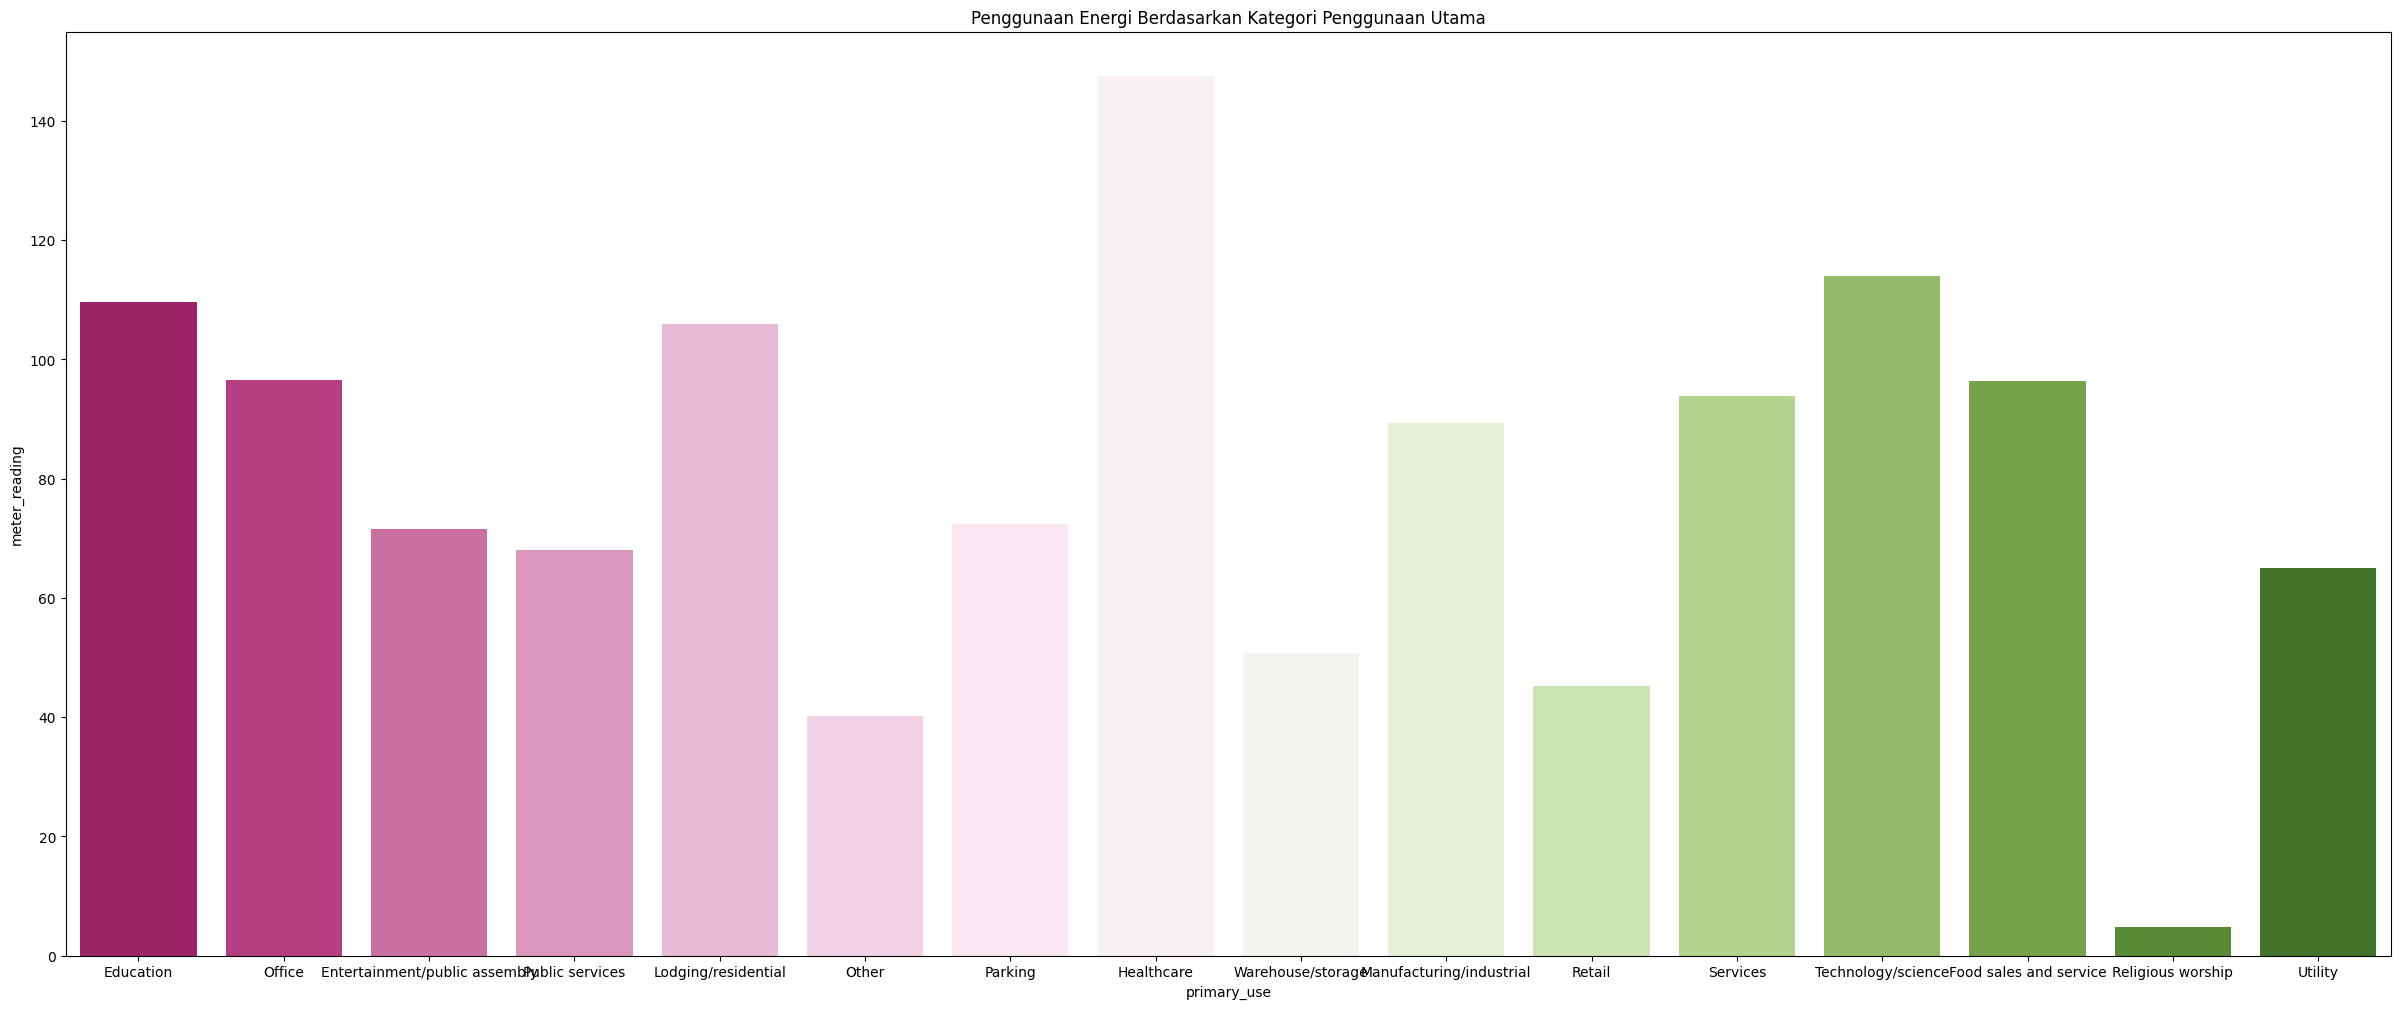

In [ ]:
order_list = ['Education', 'Office', 'Entertainment/public assembly', 'Public services', 'Lodging/residential', 'Other', 'Parking', 'Healthcare', 'Warehouse/storage', 'Manufacturing/industrial', 'Retail', 'Services', 'Technology/science', 'Food sales and service', 'Religious worship','Utility']
plt.figure(figsize=(30,12))
ax = sns.barplot(x= 'primary_use', y='meter_reading',data=df2, ci=None,order=order_list, palette='PiYG').set(title="Penggunaan Energi Berdasarkan Kategori Penggunaan Utama")

### **Interpretasi:**

Berdasarkan analisis data, terlihat bahwa sektor kesehatan (Healthcare) tercatat sebagai pengguna energi terbesar dibandingkan kategori lainnya. Oleh karena itu, disarankan agar alokasi energi sebaiknya lebih difokuskan pada sektor ini untuk memastikan kebutuhan operasionalnya terpenuhi secara optimal.

Sebaliknya, sektor Religious worship menunjukkan konsumsi energi paling rendah. Untuk sektor ini, sebaiknya alokasi energi dapat disesuaikan dengan kebutuhan minimum, sehingga sumber daya energi dapat dialokasikan lebih efisien ke sektor-sektor dengan kebutuhan yang lebih besar.

## **Heatmap Korelasi Antar Variabel Numerik**

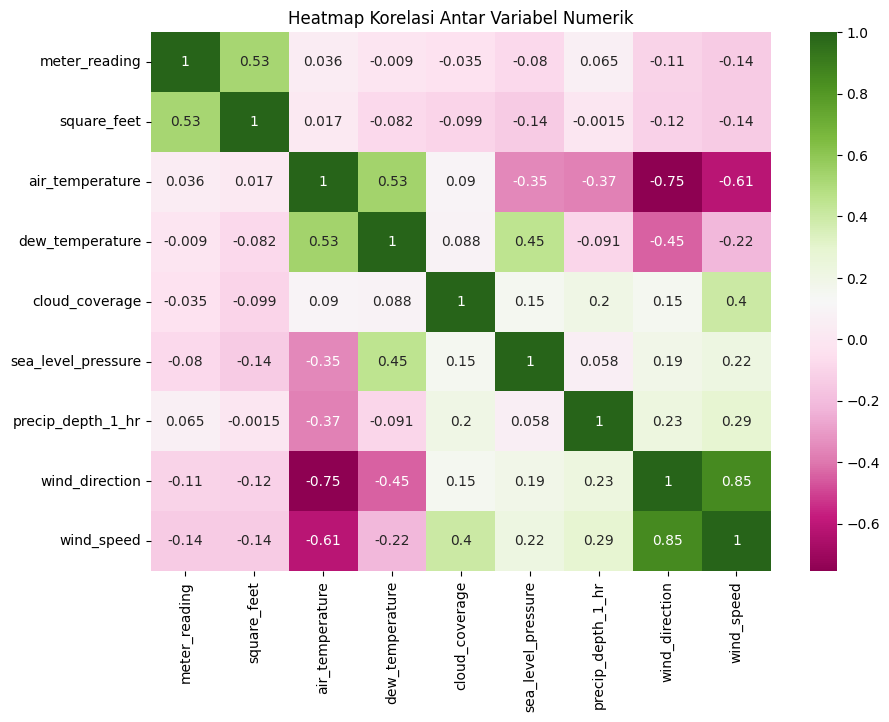

In [ ]:
numeric_cols = ['meter_reading', 'square_feet', 'air_temperature', 'dew_temperature', 'cloud_coverage', 'sea_level_pressure', 'precip_depth_1_hr', 'wind_direction', 'wind_speed']
correlation = df2[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap='PiYG')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

### **Interpretasi:**

- Nilai korelasi 0.84 menunjukkan hubungan linier positif yang sangat kuat antara wind_speed dan wind_direction. Hal ini mengindikasikan adanya kecenderungan bahwa kecepatan angin (wind_speed) meningkat seiring dengan nilai arah angin (wind_direction). Korelasi ini mencerminkan pola atmosfer tertentu, namun tidak berarti bahwa perubahan arah angin menyebabkan perubahan kecepatan angin atau sebaliknya.

- Nilai korelasi -0.76 menunjukkan hubungan linier negatif yang kuat antara 'wind_direction' dan 'air_temperature'. Terdapat kecenderungan bahwa arah angin tertentu (wind_direction) lebih sering terjadi pada suhu yang lebih rendah (air_temperature). Korelasi ini menunjukkan kemungkinan hubungan tidak langsung, seperti angin tertentu yang membawa udara dingin. Namun, ini tidak membuktikan bahwa arah angin tinggi menyebabkan suhu rendah atau sebaliknya.

- Nilai korelasi -0.60 menunjukkan hubungan linier negatif yang kuat antara wind_speed dan air_temperature. Kecepatan angin tinggi (wind_speed) cenderung terjadi pada suhu yang lebih rendah (air_temperature). Namun, tidak ada bukti bahwa kecepatan angin secara langsung memengaruhi suhu atau sebaliknya.

# **Membuat Model (Decision Tree)**

Kami memilih Decision Tree karena mudah dipahami dan diinterpretasikan. Lalu, decision tree tidak membutuhkan normalisasi atau standarisasi dan cepat untuk dilatih (run time) dibandingkan model lain.

## **Membangun Decision Tree (Model 1)**

Disini kami tidak menggunakan primary_use, karena hanya ingin berfokus pada kolom numerik, dan jika dilakukan one-hot encoding akan menambah banyak kolom sehingga menambah kompleksitas

In [ ]:
X = df2.drop(columns=['meter_reading', 'primary_use'])
y = df2['meter_reading']

In [ ]:
from sklearn.model_selection import train_test_split
seed = 9
validation_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(y_test))

(877, 8) 377


In [ ]:
X_train.columns

Index(['square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=4)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=20,
                      random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_test = dtr.predict(X_test)

mean_absolute_error_test = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE) on Test Data: {mean_absolute_error_test}")

mean_squared_error_test = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error (MSE) on Test Data: {mean_squared_error_test}")

r2_score_test = r2_score(y_test, y_pred_test)
print(f"r2 score on Test Data: {r2_score_test}")

Mean Absolute Error (MAE) on Test Data: 51.2652587766319
Mean Squared Error (MSE) on Test Data: 6099.659823239346
r2 score on Test Data: 0.33793413791366267


In [ ]:
y_pred_train = dtr.predict(X_train)

mean_absolute_error_train = mean_absolute_error(y_train, y_pred_train)
print(f"Mean Absolute Error (MAE) on Training Data: {mean_absolute_error_train}")

mean_squared_error_train = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error (MSE) on Training Data: {mean_squared_error_train}")

r2_score_train = r2_score(y_train, y_pred_train)
print(f"r2 score on Training Data: {r2_score_train}")

Mean Absolute Error (MAE) on Training Data: 36.15907283848715
Mean Squared Error (MSE) on Training Data: 3005.326198352369
r2 score on Training Data: 0.6465347141340347


### **Interpretasi Model Decision Tree Regressor Berdasarkan Metrik Evaluasi**

#### **R² Score**
- **Training Data:** 0.6465  
- **Test Data:** 0.3379  
- **Interpretasi:**  
  - R² pada data training (0.6465) lebih tinggi daripada pada data test (0.3379)(Normal dalam banyak kasus).
  - Menunjukkan model lebih baik menjelaskan hubungan dalam data training.
  - Penurunan R² (dengan jarak yang jauh) pada data test menandakan model mengalami **overfitting** karena performa pada data test memburuk dibandingkan pada data training.

---

#### **Mean Absolute Error (MAE)**
- **Training Data:** 36.16  
- **Test Data:** 51.27  
- **Interpretasi:**  
  - MAE yang lebih rendah pada data training mengindikasikan bahwa model lebih akurat dalam memprediksi data training dibandingkan data test.  
  - Peningkatan MAE pada data test mengindikasikan bahwa prediksi model untuk data test cenderung memiliki error yang lebih besar, dengan selisih yang lumayan besar maka terdektesi adanya **overfitting**.

---

#### **Mean Squared Error (MSE)**
- **Training Data:** 3005.33  
- **Test Data:** 6099.66  
- **Interpretasi:**  
  - MSE pada data test lebih besar daripada pada data training, menunjukkan bahwa error kuadrat pada prediksi data test cenderung lebih besar.  
  - Kesenjangan MSE antara training dan test menguatkan bahwa model memprediksi data training lebih baik daripada data test.
  - Ini juga menunjukkan adanya overfitting karena selisih yang sangat besar (lebih dari 50%)

---

#### **Kesimpulan Performa Model:**
   - Model memiliki performa lebih baik pada data training dibandingkan data test, menunjukkan kecenderungan **overfitting**.

Untuk **mengurangi adanya overfitting**, maka dilakukan **Regularisasi Parameter Grid** dengan menambahkan kombinasi parameter terbaik yang dapat meningkatkan kinerja model.

## **Parameter Grid (menemukan kombinasi parameter terbaik yang dapat meningkatkan kinerja model) (Model 2)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Rentang parameter yang ingin diuji
param_grid = {
    'max_depth': [3, 5, 7, 10, None],         # Batas kedalaman pohon
    'min_samples_split': [2, 5, 10, 20],      # Jumlah minimum sampel untuk split
    'min_samples_leaf': [1, 2, 5, 10],        # Jumlah minimum sampel per leaf
    'max_leaf_nodes': [None, 10, 20, 50],     # Batas jumlah leaf nodes
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05]      # Nilai alpha untuk pruning
}

# Model dasar
model = DecisionTreeRegressor()

# Grid Search dengan Cross-Validation
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Metrik evaluasi (bisa disesuaikan)
    n_jobs=-1,              # Gunakan semua core CPU untuk mempercepat
    verbose=1               # Menampilkan proses
)

# Fit model dengan grid search
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: -5063.3607487202125


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Menggunakan parameter terbaik
best_params = {'ccp_alpha': 0.0, 'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
dtr_best = DecisionTreeRegressor(**best_params)

# Latih model pada data pelatihan
dtr_best.fit(X_train, y_train)

# Evaluasi pada data test
y_pred_test = dtr_best.predict(X_test)

# Hitung MAE dan R² pada data test
from sklearn.metrics import mean_absolute_error, r2_score

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Absolute Error (MAE) on Test Data: {mae_test}")
print(f"Mean Squared Error (MSE) on Test Data: {mse_test}")
print(f"r2 score on Test Data: {r2_test}")

Mean Absolute Error (MAE) on Test Data: 51.868983611080765
Mean Squared Error (MSE) on Test Data: 6099.448567713297
r2 score on Test Data: 0.3379570678927152


In [ ]:
y_pred_train = dtr_best.predict(X_train)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Absolute Error (MAE) on Training Data: {mae_train}")
print(f"Mean Squared Error (MSE) on Training Data: {mse_train}")
print(f"r2 score on Training Data: {r2_train}")

Mean Absolute Error (MAE) on Training Data: 46.171001361361235
Mean Squared Error (MSE) on Training Data: 4340.331508991149
r2 score on Training Data: 0.4895207986342067


### **Interpretasi Model Decision Tree Regressor Berdasarkan Metrik Evaluasi**

#### **R² Score**
- **Training Data:** 0.4895  
- **Test Data:** 0.3380  
- **Interpretasi:**  
  - R² pada data training (0.4895) lebih tinggi dibandingkan pada data test (0.3380) (Normal dalam banyak kasus,
  - Menunjukkan model lebih baik menjelaskan hubungan dalam data training.
  - Penurunan R² pada data test menunjukkan adanya kemungkinan **overfitting**, meskipun masih dalam tingkat yang wajar. (lebih baik daripada sebelumnya)

---

#### **Mean Absolute Error (MAE)**
- **Training Data:** 46.17  
- **Test Data:** 51.87  
- **Interpretasi:**    
  - MAE yang lebih rendah pada data training mengindikasikan bahwa model lebih akurat dalam memprediksi data training dibandingkan data test.
  - Perbedaan antara MAE training dan test relatif kecil, menunjukkan model cukup baik dalam generalisasi.  

---

#### **Mean Squared Error (MSE)**
- **Training Data:** 4340.33  
- **Test Data:** 6099.45  
- **Interpretasi:**  
  - MSE pada data test sedikit lebih besar dibandingkan data training, menunjukkan error kuadrat pada test lebih tinggi.  
  - Penurunan ini menunjukkan kemungkinan adanya **overfitting**, tetapi model masih cukup stabil. (lebih baik daripada sebelumnya)

### **Kesimpulan**  **Performa Model:**
  
Model dengan regulasi memiliki performa yang lebih baik dibandingkan model tanpa regulasi. Hal ini terlihat dari perbedaan nilai MSE, MAE, dan R² antara data training dan test yang lebih kecil dan wajar. Perbedaan yang kecil ini menunjukkan bahwa regulasi berhasil mengurangi overfitting, berbeda dengan model tanpa regulasi yang memiliki selisih besar antara data training dan test, sehingga terindikasi overfitting. Meskipun nilai R² pada data test sedikit lebih kecil, model dengan regulasi tetap memberikan generalisasi yang lebih baik.

Selanjutnya akan dilakukan **Cross Validation** untuk memastikan model stabil pada data.

## **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(dtr_best, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validation MAE: {-cross_val_scores.mean()}")

Cross-validation MAE: 59.067790549973914


Nilai **Cross-Validation MAE** sebesar 59.07 lebih tinggi dibandingkan **Training MAE** (46.17) dan **Test MAE** (51.87), yang menunjukkan bahwa model cenderung lebih akurat pada data training dan data test tertentu. Nilai yang lebih tinggi dibandingkan MAE pada test data menunjukkan bahwa model yang di dapat cukup baik untuk data test tertentu tetapi berpotensi kurang generalisasi pada data baru. Hal ini juga bisa jadi tanda adanya potensi overfitting ringan pada model

# **Melihat Insight dan Interpretasinya**

## **Feature Importance**

In [ ]:
importances = dtr_best.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"Fitur: {feature}, Importance: {importance}")

Fitur: square_feet, Importance: 0.8305422317350247
Fitur: air_temperature, Importance: 0.0
Fitur: cloud_coverage, Importance: 0.0
Fitur: dew_temperature, Importance: 0.14454003594963472
Fitur: precip_depth_1_hr, Importance: 0.0
Fitur: sea_level_pressure, Importance: 0.02491773231534052
Fitur: wind_direction, Importance: 0.0
Fitur: wind_speed, Importance: 0.0


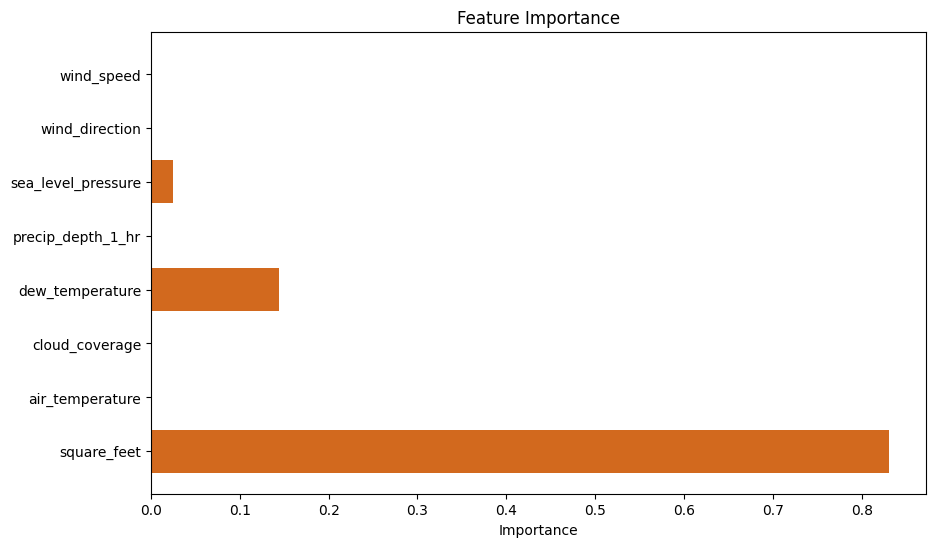

In [ ]:
importances = dtr_best.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='chocolate')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

### **Interpretasi Feature Importance Decision Tree:**

1. **Square_feet** memiliki nilai **importance yang sangat tinggi** yaitu 83.05%. Ini menunjukkan bahwa ukuran luas bangunan sangat mempengaruhi meter_reading (konsumsi energi). Semakin besar ukuran bangunan, semakin tinggi konsumsi energi yang diprediksi, hal ini menunjukkan bahwa **square_feet** adalah faktor utama dalam model ini.

2. **Dew_temperature** memiliki **importance yang cukup signifikan** sebesar 14.45%. Suhu titik embun mempengaruhi meter_reading (konsumsi energi), yang mana hal ini berkaitan dengan pengaturan kelembapan atau suhu dalam bangunan.

3. **Sea_level_pressure** memiliki **importance yang sangat rendah** yaitu 2.49%, yang menunjukkan bahwa tekanan udara di permukaan laut tidak terlalu berpengaruh terhadap konsumsi energi dalam model ini.

4. Fitur-fitur lainnya, seperti **air_temperature**, **cloud_coverage**, **precip_depth_1_hr**, **wind_direction**, dan **wind_speed**, memiliki **importance sebesar 0.0**, yang berarti model tidak memanfaatkan informasi dari fitur-fitur ini dalam prediksi konsumsi energi. Fitur-fitur ini tidak memiliki pengaruh yang cukup kuat atau relevansi langsung terhadap konsumsi energi dalam dataset ini.

### **Insight:**
Square_feet menjadi fitur utama dalam memprediksi meter_reading (konsumsi energi), yang menunjukkan bahwa ukuran bangunan adalah faktor yang paling berpengaruh. Hal ini menunjukkan bahwa dalam pengelolaan energi, bangunan yang lebih besar akan cenderung membutuhkan lebih banyak energi untuk pemanasan, pendinginan, dan penerangan.

Selain itu, dew_temperature juga mempengaruhi konsumsi energi, yang kemungkinan berkaitan dengan kebutuhan sistem pendingin atau pemanas untuk menjaga suhu dan kelembapan di dalam ruangan.

Di sisi lain, fitur seperti air_temperature, cloud_coverage, dan wind_speed tidak memberikan kontribusi yang berarti dalam model ini.

### **Rekomendasi:**
Berdasarkan hasil feature importance, pengelolaan energi pada bangunan sebaiknya difokuskan pada bangunan dengan luas besar (**square_feet**) karena mereka cenderung memiliki konsumsi energi lebih tinggi. Untuk efisiensi, perlu dioptimalkan sistem pemanas, pendingin, dan pencahayaan di bangunan besar. Selain itu, faktor **dew_temperature** menunjukkan perlunya sistem kontrol kelembapan dan suhu yang lebih baik untuk mengurangi konsumsi energi. Fitur lingkungan lain seperti angin dan curah hujan tidak relevan, sehingga tidak perlu jadi prioritas dalam analisis atau pengelolaan energi.

## **Visualisasi Pohon Keputusan**

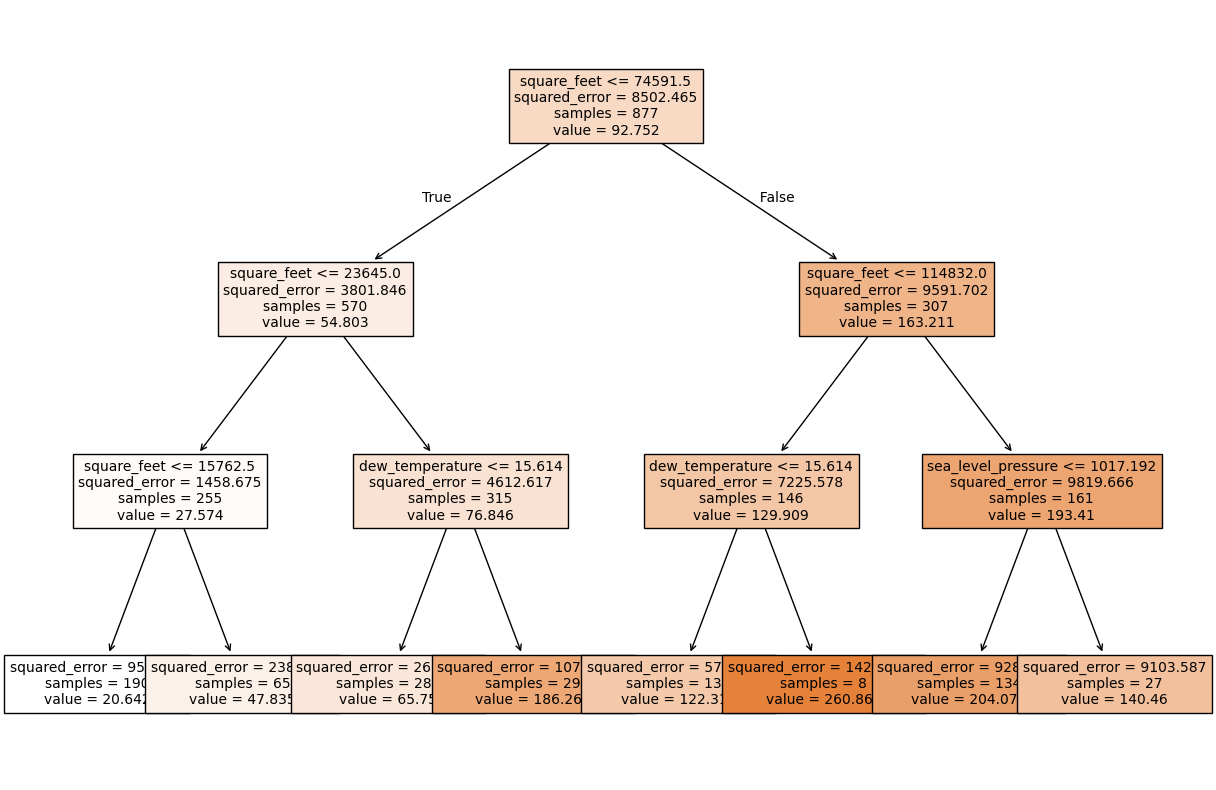

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(dtr_best, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

### **Interpretasi Pohon Keputusan:**

Pohon keputusan menunjukkan bahwa **luas bangunan** (square_feet) adalah faktor utama yang memengaruhi konsumsi energi. Bangunan dengan luas lebih kecil (≤ 74591,5 kaki persegi) cenderung memiliki kesalahan prediksi yang lebih rendah, menunjukkan konsumsi energi yang lebih mudah diprediksi. Selanjutnya, **suhu embun** (dew_temperature) berperan dalam memisahkan bangunan dengan luas kecil; bangunan dengan suhu embun rendah membutuhkan energi lebih sedikit untuk pengaturan suhu. Untuk bangunan yang lebih besar (luas > 74591,5 kaki persegi), pemisahan berdasarkan **tekanan permukaan laut** (sea_level_pressure) menunjukkan bahwa kondisi atmosfer memengaruhi efisiensi sistem pemanas, ventilasi, dan pendingin udara dan konsumsi energi.

### **Insight:**
- Bangunan yang lebih besar cenderung memiliki konsumsi energi yang lebih tinggi, yang sudah diharapkan, namun hubungan ini lebih kompleks dengan fitur lain seperti suhu embun dan tekanan permukaan laut.
- Suhu embun dan tekanan permukaan laut berperan penting dalam memprediksi konsumsi energi, menunjukkan pentingnya kondisi lingkungan dalam pengelolaan energi di bangunan.

### **Rekomendasi:**
Untuk bangunan kecil, pengelolaan energi bisa difokuskan pada sistem pengaturan suhu yang efisien, terutama saat suhu embun rendah. Sedangkan untuk bangunan besar, penting untuk mempertimbangkan kondisi atmosfer, seperti tekanan permukaan laut, dalam merancang sistem pemanas dan pendingin agar lebih hemat energi. Secara keseluruhan, manajemen energi harus menyesuaikan strategi berdasarkan ukuran bangunan dan faktor lingkungan yang relevan.

## **Residuals vs Predicted Value**

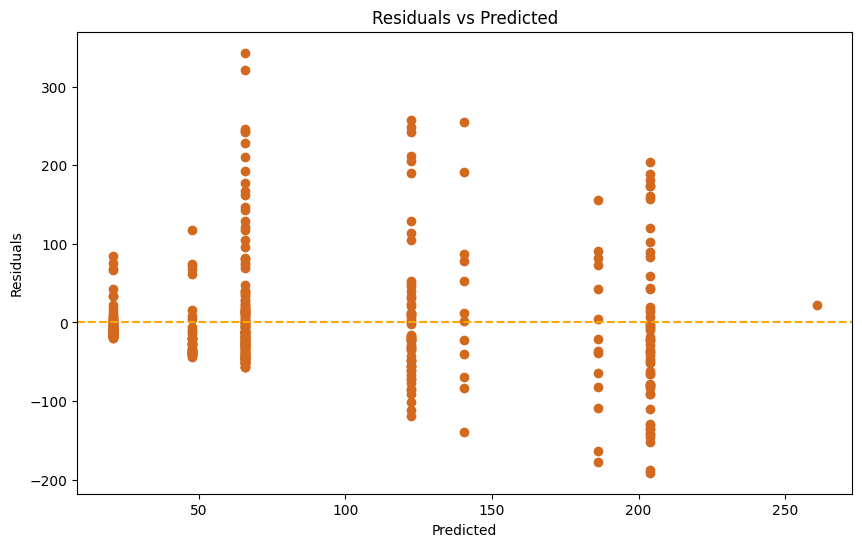

In [ ]:
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, color='chocolate')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

Grafik **Residuals vs Predicted** diatas menunjukkan bahwa sebagian besar residual (selisih antara nilai aktual dan prediksi) tersebar di sekitar 0, yang berarti model tidak bias. Namun, ada beberapa titik yang jauh dari garis 0, yang menunjukkan bahwa model kesulitan dalam memprediksi beberapa nilai, terutama pada nilai yang lebih tinggi. Ini bisa mengindikasikan adanya **outlier** yang mempengaruhi hasil prediksi, meskipun secara keseluruhan model cukup baik.

## **Learning Curves**

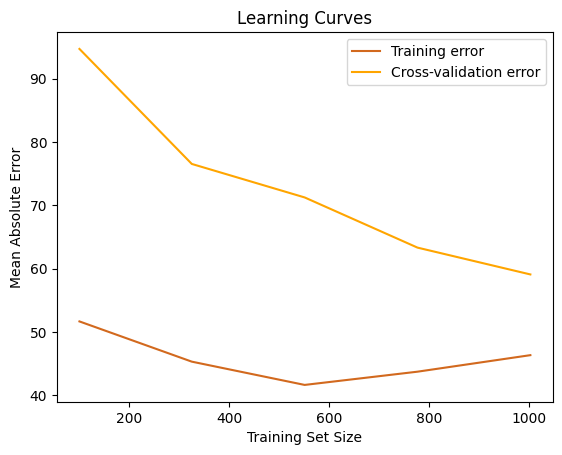

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(dtr_best, X, y, cv=5, scoring='neg_mean_absolute_error')
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training error', color='chocolate')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Cross-validation error', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Learning Curves')
plt.show()

### **Interpretasi Grafik Learning Curve:**

1. **Training Error (Garis Biru):** Menunjukkan kesalahan pada data pelatihan. Pada awalnya, error rendah, tetapi sedikit meningkat saat data pelatihan ditambah, karena model jadi lebih general dan tidak hanya "menghafal" data.

2. **Cross-Validation Error (Garis Oranye):** Menunjukkan kesalahan pada data validasi. Pada awalnya tinggi karena model kurang data, tapi menurun seiring bertambahnya ukuran data pelatihan, yang menunjukkan model mulai lebih baik dalam generalisasi.

### **Insight:**

Grafik learning curve menunjukkan bahwa model mengalami overfitting, terlihat dari kesenjangan besar antara training error yang rendah dan cross-validation error yang tinggi. Meski cross-validation error menurun seiring bertambahnya data pelatihan, kesenjangan tetap ada, menunjukkan model kurang mampu menggeneralisasi. Selain itu, training error yang mulai meningkat pada dataset besar menunjukkan bahwa model mendekati batas kemampuannya belajar pola dari data.

# **Rekomendasi**

**Rekomendasi Pengelolaan Energi:**  

- Bangunan yang luasnya besar cenderung punya konsumsi energi lebih tinggi. Teknologi seperti lampu LED hemat energi atau sensor otomatis bisa dipakai untuk mengurangi konsumsi energi secara signifikan.  

- Suhu embun punya pengaruh besar pada konsumsi energi. Karena itu, penting untuk memastikan bangunan punya sistem pengaturan suhu dan kelembapan yang efisien, seperti AC yang hemat energi.  

- Bangunan kecil berfokus pada efisiensi pengaturan suhu, khususnya saat suhu embun rendah, dengan teknologi yang sesuai kebutuhan. Sedangkan bangunan besar selain pengaturan suhu, faktor lingkungan seperti tekanan permukaan laut juga perlu diperhatikan untuk memastikan sistem pemanas dan pendingin lebih hemat energi.  

- Teknologi seperti *smart system* untuk memonitor penggunaan energi secara real-time bisa membantu menemukan pola konsumsi energi dan area yang bisa dihemat.

- Pengelola gedung perlu diberi pemahaman tentang pengelolaan energi berbasis data. Dengan begitu, mereka bisa menerapkan strategi penghematan energi yang sesuai dengan kebutuhan bangunan masing-masing.

# **Kesimpulan**

Model **Decision Tree Regressor** yang dikembangkan berhasil memberikan wawasan penting dalam prediksi konsumsi energi bangunan, dengan fokus pada faktor utama seperti luas bangunan (**square_feet**) dan suhu embun (**dew_temperature**) sebagai fitur yang paling berpengaruh. Meskipun terdapat indikasi overfitting yang kecil, penerapan regulasi telah membantu meningkatkan generalisasi model pada data test, yang terlihat dari perbedaan yang wajar antara nilai **R²**, **MAE**, dan **MSE** pada data training dan test. Model ini menunjukkan bahwa ukuran bangunan secara langsung memengaruhi konsumsi energi, sedangkan faktor lingkungan seperti suhu embun dan tekanan udara juga memberikan kontribusi kecil tetapi relevan. Namun, fitur lain seperti kecepatan angin dan curah hujan tidak memiliki pengaruh yang signifikan dalam model ini, sehingga dapat diabaikan. Hasil ini menggarisbawahi pentingnya pengelolaan energi berbasis karakteristik bangunan untuk efisiensi yang lebih baik.